# Exploring the Lorenz System of Differential Equations

In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

This is one of the classic systems in non-linear differential equations. It exhibits a range of different
behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied.

## Imports

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy.

In [1]:
%matplotlib inline
import seaborn

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions.
This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$),
the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [4]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, σ=10.0, β=8./3, ρ=28.0, ret=True):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(point, t0, σ=σ, β=β, ρ=ρ):
        """Compute the time-derivative of a Lorentz system."""
        (x, y, z) = point
        return [σ * (y - x), x * (ρ - z) - y, x * y - β * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()
    if ret: 
        return t, x_t

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

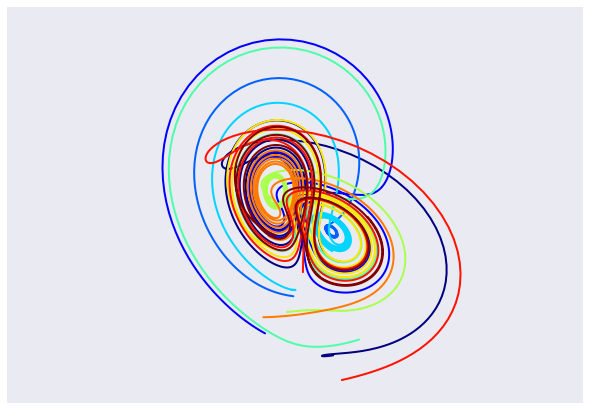

In [6]:
t, x_t = solve_lorenz(angle=10, N=10)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

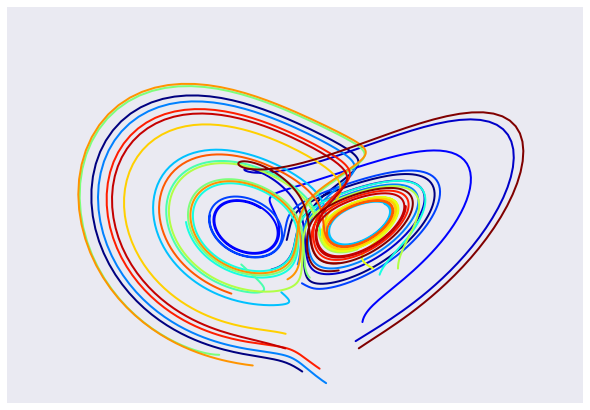

(array([ 0.        ,  0.00400891,  0.00801782,  0.01202673,  0.01603563,
         0.02004454,  0.02405345,  0.02806236,  0.03207127,  0.03608018,
         0.04008909,  0.044098  ,  0.0481069 ,  0.05211581,  0.05612472,
         0.06013363,  0.06414254,  0.06815145,  0.07216036,  0.07616927,
         0.08017817,  0.08418708,  0.08819599,  0.0922049 ,  0.09621381,
         0.10022272,  0.10423163,  0.10824053,  0.11224944,  0.11625835,
         0.12026726,  0.12427617,  0.12828508,  0.13229399,  0.1363029 ,
         0.1403118 ,  0.14432071,  0.14832962,  0.15233853,  0.15634744,
         0.16035635,  0.16436526,  0.16837416,  0.17238307,  0.17639198,
         0.18040089,  0.1844098 ,  0.18841871,  0.19242762,  0.19643653,
         0.20044543,  0.20445434,  0.20846325,  0.21247216,  0.21648107,
         0.22048998,  0.22449889,  0.2285078 ,  0.2325167 ,  0.23652561,
         0.24053452,  0.24454343,  0.24855234,  0.25256125,  0.25657016,
         0.26057906,  0.26458797,  0.26859688,  0.2

In [7]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), σ=(0.0,50.0), ρ=(0.0,50.0))
display(w)

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [8]:
t, x_t = w.result

In [9]:
w.kwargs

{'N': 17,
 'angle': 119.1,
 'max_time': 1.8,
 'ret': True,
 'β': 2.43333,
 'ρ': 24.3,
 'σ': 16.6}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [10]:
xyz_avg = x_t.mean(axis=1)

In [11]:
xyz_avg.shape

(17, 3)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

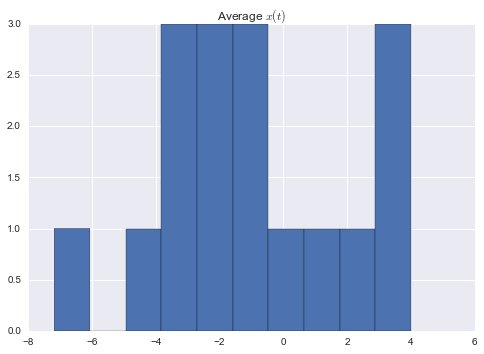

In [12]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$')

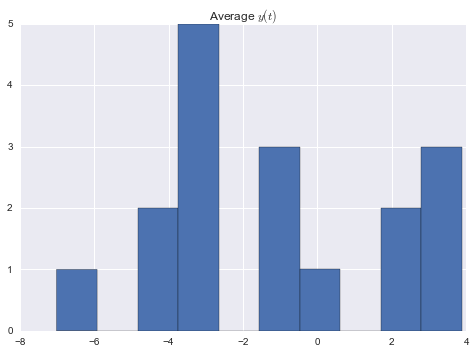

In [13]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')

### Notebook store multiple Mimetypes

In [14]:
class Obj:
    
    def __repr__(self):
        return "here you can see the text representation"
    
    def _repr_html_(self):
        return "the html repr can get <i>emphasis</i> and <b>Bold</b> for example"
    
    def _repr_latex_(self):
        return "$$\int_0^x {t^2/3} dt = x^3$$ This will appear in the PDF version"

In [15]:
Obj()

here you can see the text representation

This is extremly important as you can provide the **best** representation **a posteriori** without re-running
an analysis. The data is embeded **into** the notebook.

In [17]:
from IPython.display import YouTubeVideo

Will give you a correct thumbnail, but could be light-table/film-like storyboard for static media.